In [1]:
!pip install requests pandas matplotlib seaborn


In [2]:
API_KEY = "1ec30415ee089b956ebc60882826c1e5"


In [3]:
import requests
import pandas as pd

def get_weather_data(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    weather = {
        'City': city,
        'Temperature (°C)': data['main']['temp'],
        'Humidity (%)': data['main']['humidity'],
        'Pressure (hPa)': data['main']['pressure'],
        'Weather': data['weather'][0]['main'],
        'Wind Speed (m/s)': data['wind']['speed']
    }
    
    return weather


In [4]:
cities = ['London', 'New York', 'Tokyo', 'Paris', 'Mumbai', 'Sydney']
weather_list = [get_weather_data(city, API_KEY) for city in cities]

df = pd.DataFrame(weather_list)
df


KeyError: 'main'

In [6]:
def get_weather_data(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    # Print the full response to debug
    print(f"API response for {city}:\n{data}\n")

    if response.status_code != 200 or 'main' not in data:
        return {'City': city, 'Error': data.get('message', 'Unknown error')}
    
    weather = {
        'City': city,
        'Temperature (°C)': data['main']['temp'],
        'Humidity (%)': data['main']['humidity'],
        'Pressure (hPa)': data['main']['pressure'],
        'Weather': data['weather'][0]['main'],
        'Wind Speed (m/s)': data['wind']['speed']
    }
    
    return weather


In [7]:
df.to_csv("weather_data.csv", index=False)


NameError: name 'df' is not defined

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

API_KEY = "1ec30415ee089b956ebc60882826c1e5"

def get_weather_data(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    # Debug print
    if 'main' not in data:
        print(f"❌ Error for {city}: {data.get('message', 'Unknown error')}")
        return None
    
    weather = {
        'City': city,
        'Temperature (°C)': data['main']['temp'],
        'Humidity (%)': data['main']['humidity'],
        'Pressure (hPa)': data['main']['pressure'],
        'Weather': data['weather'][0]['main'],
        'Wind Speed (m/s)': data['wind']['speed']
    }
    
    return weather

cities = ['London', 'New York', 'Tokyo', 'Paris', 'Mumbai', 'Sydney']
weather_list = []

for city in cities:
    result = get_weather_data(city, API_KEY)
    if result:
        weather_list.append(result)

# Only create DataFrame if there are results
if weather_list:
    df = pd.DataFrame(weather_list)
    display(df)

    # Save to CSV
    df.to_csv("weather_data.csv", index=False)
    print("✅ Weather data saved to weather_data.csv")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='City', y='Temperature (°C)', palette='coolwarm')
    plt.title('Temperature in Different Cities')
    plt.show()
else:
    print("⚠️ No valid weather data found.")


❌ Error for London: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
❌ Error for New York: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
❌ Error for Tokyo: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
❌ Error for Paris: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
❌ Error for Mumbai: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
❌ Error for Sydney: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
⚠️ No valid weather data found.


In [9]:
API_KEY = "1ec30415ee089b956ebc60882826c1e5"


In [10]:
import requests

API_KEY = "1ec30415ee089b956ebc60882826c1e5"
city = "London"

url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
response = requests.get(url)

print(response.status_code)
print(response.json())


200
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 14.93, 'feels_like': 14.25, 'temp_min': 13.34, 'temp_max': 16.1, 'pressure': 1021, 'humidity': 68, 'sea_level': 1021, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 62, 'gust': 4.02}, 'clouds': {'all': 0}, 'dt': 1747730653, 'sys': {'type': 2, 'id': 268730, 'country': 'GB', 'sunrise': 1747713700, 'sunset': 1747770761}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [11]:
import requests
import pandas as pd

API_KEY = "1ec30415ee089b956ebc60882826c1e5"

def get_weather_data(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    return {
        'City': city,
        'Temperature (°C)': data['main']['temp'],
        'Humidity (%)': data['main']['humidity'],
        'Weather': data['weather'][0]['description']
    }

cities = ['London', 'New York', 'Tokyo', 'Paris', 'Mumbai', 'Sydney']
weather_data = [get_weather_data(city, API_KEY) for city in cities]

df = pd.DataFrame(weather_data)
print(df)


       City  Temperature (°C)  Humidity (%)          Weather
0    London             14.93            68        clear sky
1  New York              9.93            66        clear sky
2     Tokyo             28.77            51        clear sky
3     Paris             18.75            49        clear sky
4    Mumbai             30.90            74  overcast clouds
5    Sydney             18.08            69  overcast clouds


In [12]:
import requests
import pandas as pd

API_KEY = "1ec30415ee089b956ebc60882826c1e5"

def get_weather_data(city, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()

    if response.status_code != 200:
        print(f"Error fetching {city}: {data.get('message', 'Unknown error')}")
        return None
    
    return {
        'City': city,
        'Temperature (°C)': data['main']['temp'],
        'Humidity (%)': data['main']['humidity'],
        'Weather': data['weather'][0]['description']
    }

cities = ['London', 'New York', 'Tokyo', 'Paris', 'Mumbai', 'Sydney']
weather_data = []

for city in cities:
    data = get_weather_data(city, API_KEY)
    if data:
        weather_data.append(data)

df = pd.DataFrame(weather_data)
print(df)


       City  Temperature (°C)  Humidity (%)          Weather
0    London             14.93            68        clear sky
1  New York              9.93            66        clear sky
2     Tokyo             28.77            51        clear sky
3     Paris             18.75            49        clear sky
4    Mumbai             30.90            74  overcast clouds
5    Sydney             18.08            69  overcast clouds


In [13]:
df.to_csv('weather_data.csv', index=False)
print("Weather data saved to weather_data.csv")


Weather data saved to weather_data.csv


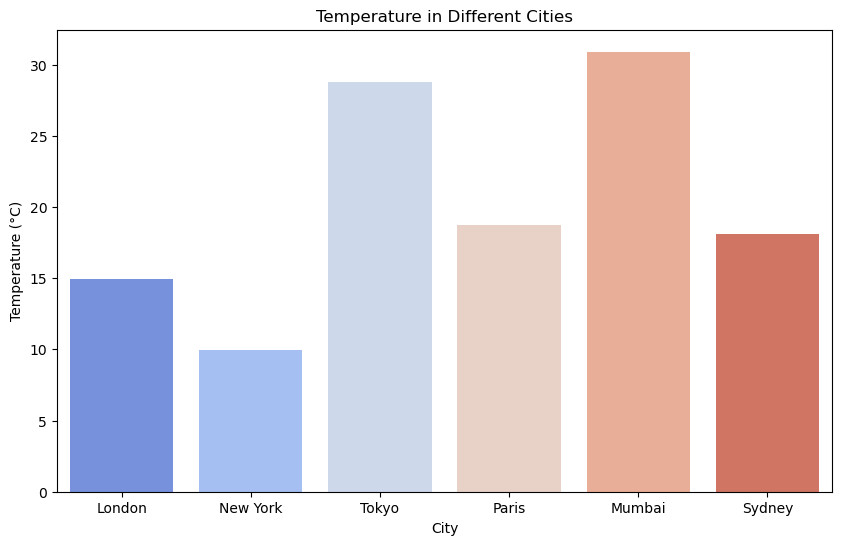

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='City', y='Temperature (°C)', data=df, palette='coolwarm')
plt.title('Temperature in Different Cities')
plt.show()
